#### Importing libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

#### Reading csv file to notebook

In [9]:
#Read the csv file
data = pd.read_csv('./files_for_lab/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Split the Dataset into X ('tenure', 'SeniorCitizen', 'MonthlyCharges') and y ('Churn')

In [15]:
# X/y split
X = data[['SeniorCitizen', 'tenure', 'MonthlyCharges']]
y = data['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [17]:
# Look at X to explore the data
X

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [18]:
#Check for NaN values for X
X.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
dtype: int64

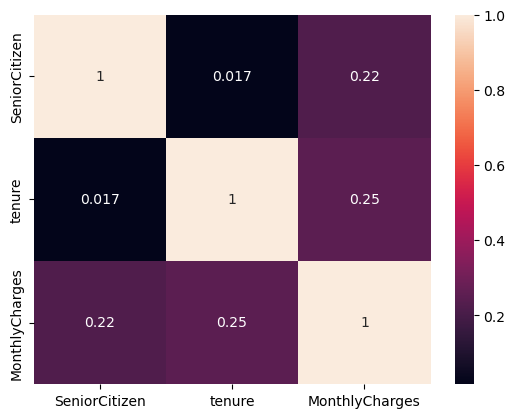

In [19]:
#Checking for collinearity
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

##### Train Test split

In [22]:
# Before standardization takes place, train-test split has to be performed
X_train, X_test, y_train, y_test = train_test_split(X, y)

##### Standardization of X_train and X_test

In [23]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

In [24]:
# Looking at X_train and X_test after scaling
display(X_train_scaled)
display(X_test_scaled)

,SeniorCitizen,tenure,MonthlyCharges
0,-0.448331,-0.425416,-0.358005
1,-0.448331,0.105289,-1.504190
2,-0.448331,1.615759,0.175104
3,-0.448331,-1.201063,-1.519184
4,-0.448331,-0.711181,-1.504190
...,...,...,...
5277,-0.448331,1.574936,0.055155
5278,-0.448331,-0.956122,0.333371
5279,-0.448331,-1.282710,-0.316356
5280,-0.448331,-0.547887,0.651571


,SeniorCitizen,tenure,MonthlyCharges
0,-0.448331,1.615759,0.649905
1,-0.448331,1.534112,-1.327597
2,2.230496,0.717642,-1.332595
3,-0.448331,-1.037769,-1.505856
4,-0.448331,1.574936,-0.038139
...,...,...,...
1756,2.230496,-1.282710,0.306716
1757,-0.448331,1.574936,0.721541
1758,2.230496,-0.956122,0.639909
1759,-0.448331,-0.670357,-1.515852


In [25]:
#Looking at index numbers from y_train
y_train.head()

2639    Yes
5503     No
5613     No
4259    Yes
3839     No
Name: Churn, dtype: object

##### Reset index of y_train and y_test (helpful for future concats with the X)

In [26]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 


In [27]:
#checking index reset
display(y_train.head())
display(y_test.head())

0    Yes
1     No
2     No
3    Yes
4     No
Name: Churn, dtype: object

0     No
1     No
2     No
3    Yes
4     No
Name: Churn, dtype: object

### Build the logistic regression model and evaluate it

In [28]:
#Performing Logistic regression Model
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train_scaled, y_train)
display(LR.score(X_train_scaled, y_train))
display(LR.score(X_test_scaled, y_test))

0.7862552063612268

0.7978421351504826

In [31]:
#Make predictions of target for test data
pred = LR.predict(X_test_scaled) #set of predictions
pred

array(['No', 'No', 'No', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [37]:
print("precision: ",precision_score(y_test,pred, average='binary', pos_label = 'Yes', labels=['Yes', 'No']))
print("recall: ",recall_score(y_test,pred, average='binary', pos_label = 'Yes', labels=['Yes', 'No']))
print("f1: ",f1_score(y_test,pred, average='binary', pos_label = 'Yes', labels=['Yes', 'No']))

precision:  0.6366366366366366
recall:  0.4742729306487696
f1:  0.5435897435897437


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1193,  121],
       [ 235,  212]], dtype=int64)

###### The model has an accuracy of 79.78% with the test data. This means that for 79.78% of the test data, the correct value for the target Churn was predicted. The precision value is 63.66%, so for approx. 36% of customers, they were predicted as churn although they are still customers. The recall value is 47.42%, meaning that more than half of the customers which had an actual value "Yes" in the Churn column were predicted as "No" so they were not recognized as churn customers.

### Even a simple model will give us more than 70% accuracy. Why?

##### The accuracy of this model is high, because we have a huge imbalance in our data of the target:

In [44]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##### The number of "No" values (still a customer) compared to a "Yes" value (churn, not a customer anymore) is approx. 2.7x higher. This is a significant imbalance in the dataset and has the consequence that by blindly guessing a "No" the chances that this is a correct prediction is quite high. Consequently, the probability for missing a churn customer is quite high. By balancing the data with e.g. SMOTE the value for precision and recall can be improved:

### Apply imblearn.over_sampling.SMOTE to the dataset.

In [45]:
sm = SMOTE(k_neighbors=5)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

### Build the model after applying SMOTE

In [49]:
LR = LogisticRegression(solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print(LR.score(X_train_scaled, y_train))
print(LR.score(X_test_scaled, y_test))
print("precision: ",precision_score(y_test,pred, average='binary', pos_label = 'Yes'))
print("recall: ",recall_score(y_test,pred, average='binary', pos_label = 'Yes'))
print("f1: ",f1_score(y_test,pred, average='binary', pos_label = 'Yes'))

0.7307837940174177
0.7336740488358887
precision:  0.48338368580060426
recall:  0.7158836689038032
f1:  0.5770964833183048


### Evaluate the logistic regression model. Is it there any improvement?

##### The accuracy value changed from approx. 79% to 73%, so got little worse. The precision value changed from approx. 64% to 48%. This means that now more than half of the customers who are not churn (actual value No, predicted value Yes) were predicted to be churn. On the other hand, the recall value improved a lot from previously 47.42% to now 71.58%. This means, that for 30% of the customers it is missed that they are churn customers (actual value is a Yes but was predicted as No). 

##### In conclusion, recall got way better, so churn can be predicted in many more cases (which would be good for a company), but falsely predicting churn also grew tremendously to nearly 50% (lower precision value than before, not so good when a company sees approx., 50% of the customers falsely as churn). All in all, I would not say that this is a good model, it should be tried to get a better precision value. 

### Approach for better balancing of precision and recall values: Using Oversampling instead of SMOTE

In [50]:
# oversampling / undersampling is only to be done on the TRAINING set
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,-0.448331,-0.425416,-0.358005,Yes
1,-0.448331,0.105289,-1.504190,No
2,-0.448331,1.615759,0.175104,No
3,-0.448331,-1.201063,-1.519184,Yes
4,-0.448331,-0.711181,-1.504190,No


In [51]:
# separate majority/minority classes
no_churn = train[train['Churn']=='No']
yes_churn = train[train['Churn']=='Yes']

In [52]:
display(no_churn.shape)
display(yes_churn.shape)

(3860, 4)

(1422, 4)

In [53]:
# oversample minority
yes_churn_oversampled = resample(yes_churn, #<- sample from here
                                    replace=True,            #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no_churn))  #<- make both sets the same size

In [54]:
# both sets are now of a reasonable size
display(no_churn.shape)
display(yes_churn_oversampled.shape)
yes_churn_oversampled.head(20)

(3860, 4)

(3860, 4)

,SeniorCitizen,tenure,MonthlyCharges,Churn
2257,2.230496,0.431877,-0.321354,Yes
2511,-0.448331,-1.282710,-0.991072,Yes
3195,2.230496,-1.282710,0.148449,Yes
4222,-0.448331,1.207524,1.164689,Yes
974,2.230496,0.391054,0.298386,Yes
1857,-0.448331,1.534112,1.681138,Yes
2220,-0.448331,0.023642,1.306296,Yes
586,2.230496,-0.302946,0.791512,Yes
4603,-0.448331,-0.180475,0.976434,Yes
4775,2.230496,-1.119416,0.598260,Yes


In [56]:
#Concat No and Yes data
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled

,SeniorCitizen,tenure,MonthlyCharges,Churn
1,-0.448331,0.105289,-1.504190,No
2,-0.448331,1.615759,0.175104,No
4,-0.448331,-0.711181,-1.504190,No
5,-0.448331,-1.241886,-1.530845,No
6,2.230496,1.574936,1.482888,No
...,...,...,...,...
4370,-0.448331,-1.119416,0.451655,Yes
3714,-0.448331,-1.119416,0.345033,Yes
3576,-0.448331,-0.670357,0.526623,Yes
33,-0.448331,-1.037769,0.330039,Yes


#### Building new model, test and evaluate it

In [58]:
# Perform X/y split from oversampled training data
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [59]:
#Make Model and calculate score
LR_over = LogisticRegression(solver='lbfgs')
LR_over.fit(X_train_over, y_train_over)
display(LR_over.score(X_train_over, y_train_over))
display(LR_over.score(X_train_over, y_train_over))

#Make predictions
pred = LR_over.predict(X_test_scaled)

#Calculate precision, recall and f1
print("precision: ",precision_score(y_test,pred, average='binary', pos_label = 'Yes'))
print("recall: ",recall_score(y_test,pred, average='binary', pos_label = 'Yes'))
print("f1: ",f1_score(y_test,pred, average='binary', pos_label = 'Yes'))

0.7354922279792746

0.7354922279792746

precision:  0.4827586206896552
recall:  0.7203579418344519
f1:  0.578096947935368


### Is there any improvement?

##### All values (Score, precision, recall and f1) are nearly the same as with the SMOTE data balancing approach.